In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
import seaborn as sns
from scipy.stats import multivariate_normal
from numpy.linalg import inv

In [15]:
def get_points_gaussian_noise(w0,w1):
    x = np.linspace(-1,1,10)
    y = []

    for i in x:
        gaussian_error = np.random.normal(0,.04)
        Y = w0 + w1 * i + gaussian_error
        y.append(Y)
    
    return x,y

In [16]:
def get_points(w0,w1):
    x = np.linspace(-1,1,10)
    y = []

    for i in x:
        Y = w0 + w1 * i
        y.append(Y)

    return x,y

In [17]:
x_real,y_real = get_points(-.3,.5)
x,y = get_points_gaussian_noise(-.3,.5)

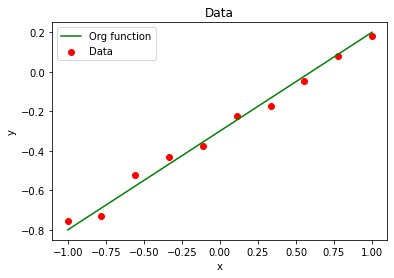

In [18]:
plt.scatter(x,y,color='red')
plt.plot(x_real,y_real,color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.legend(['Org function','Data'],loc='upper left')
plt.show()

In [19]:
def get_gaussian_val(x,mu,var):
    sigma = math.sqrt(var)
    y = (1/(sigma*math.sqrt(2*np.pi)))*((np.exp([1])[0])**(-0.5*(((x-mu)/sigma)**2)))
    return y

In [20]:
def get_prior_grid_calc(w0,w1,mean,var):
    prior_grid = np.zeros((len(w0),len(w1)))

    for i in range(len(w0)):
        for j in range(len(w1)):
            prior_grid[i][j] = multivariate_normal.pdf([w0[i], w1[j]], [mean,mean], [[var,0], [0,var]])
    
    return prior_grid

In [21]:
def get_likelihood_grid_calc(w0,w1,x,y):
    likelihood_grid = np.zeros((len(w0),len(w1)))

    for i in range(len(w0)):
        for j in range(len(w1)):
            for k in range(len(x)):
                single_point_prob = get_gaussian_val(y[k], w0[i] + w1[j] * x[k],0.04)

                if k==0:
                    likelihood_grid[i][j] = single_point_prob
                else:
                    likelihood_grid[i][j] = likelihood_grid[i][j] * single_point_prob

    return likelihood_grid

In [22]:
def get_posterior_grid_calc(prior_grid, likelihood_grid):
    posterior_grid = likelihood_grid * prior_grid
    return posterior_grid

In [23]:
def pick_n_lines(m0,s0,beta,phi,t):
    phi = np.array(phi).reshape(1, 2)
    sn = inv(inv(s0) + beta*(np.transpose(phi)@phi))   # @ denotes Matrix Multiplication
    m0 = np.array(m0).reshape(2, 1)
    t = [t]
    mn = sn@(inv(s0)@m0 + beta*(np.transpose(phi).reshape(2, 1)@t))
    mn = list(mn.reshape(1, 2)[0])
    a0,a1=np.random.multivariate_normal(mn, sn, 10).T
    return a0,a1,mn,sn

In [24]:
w0 = np.array(np.linspace(-1,1,100))
w1 = np.array(np.linspace(-1,1,100))

<Figure size 432x288 with 0 Axes>

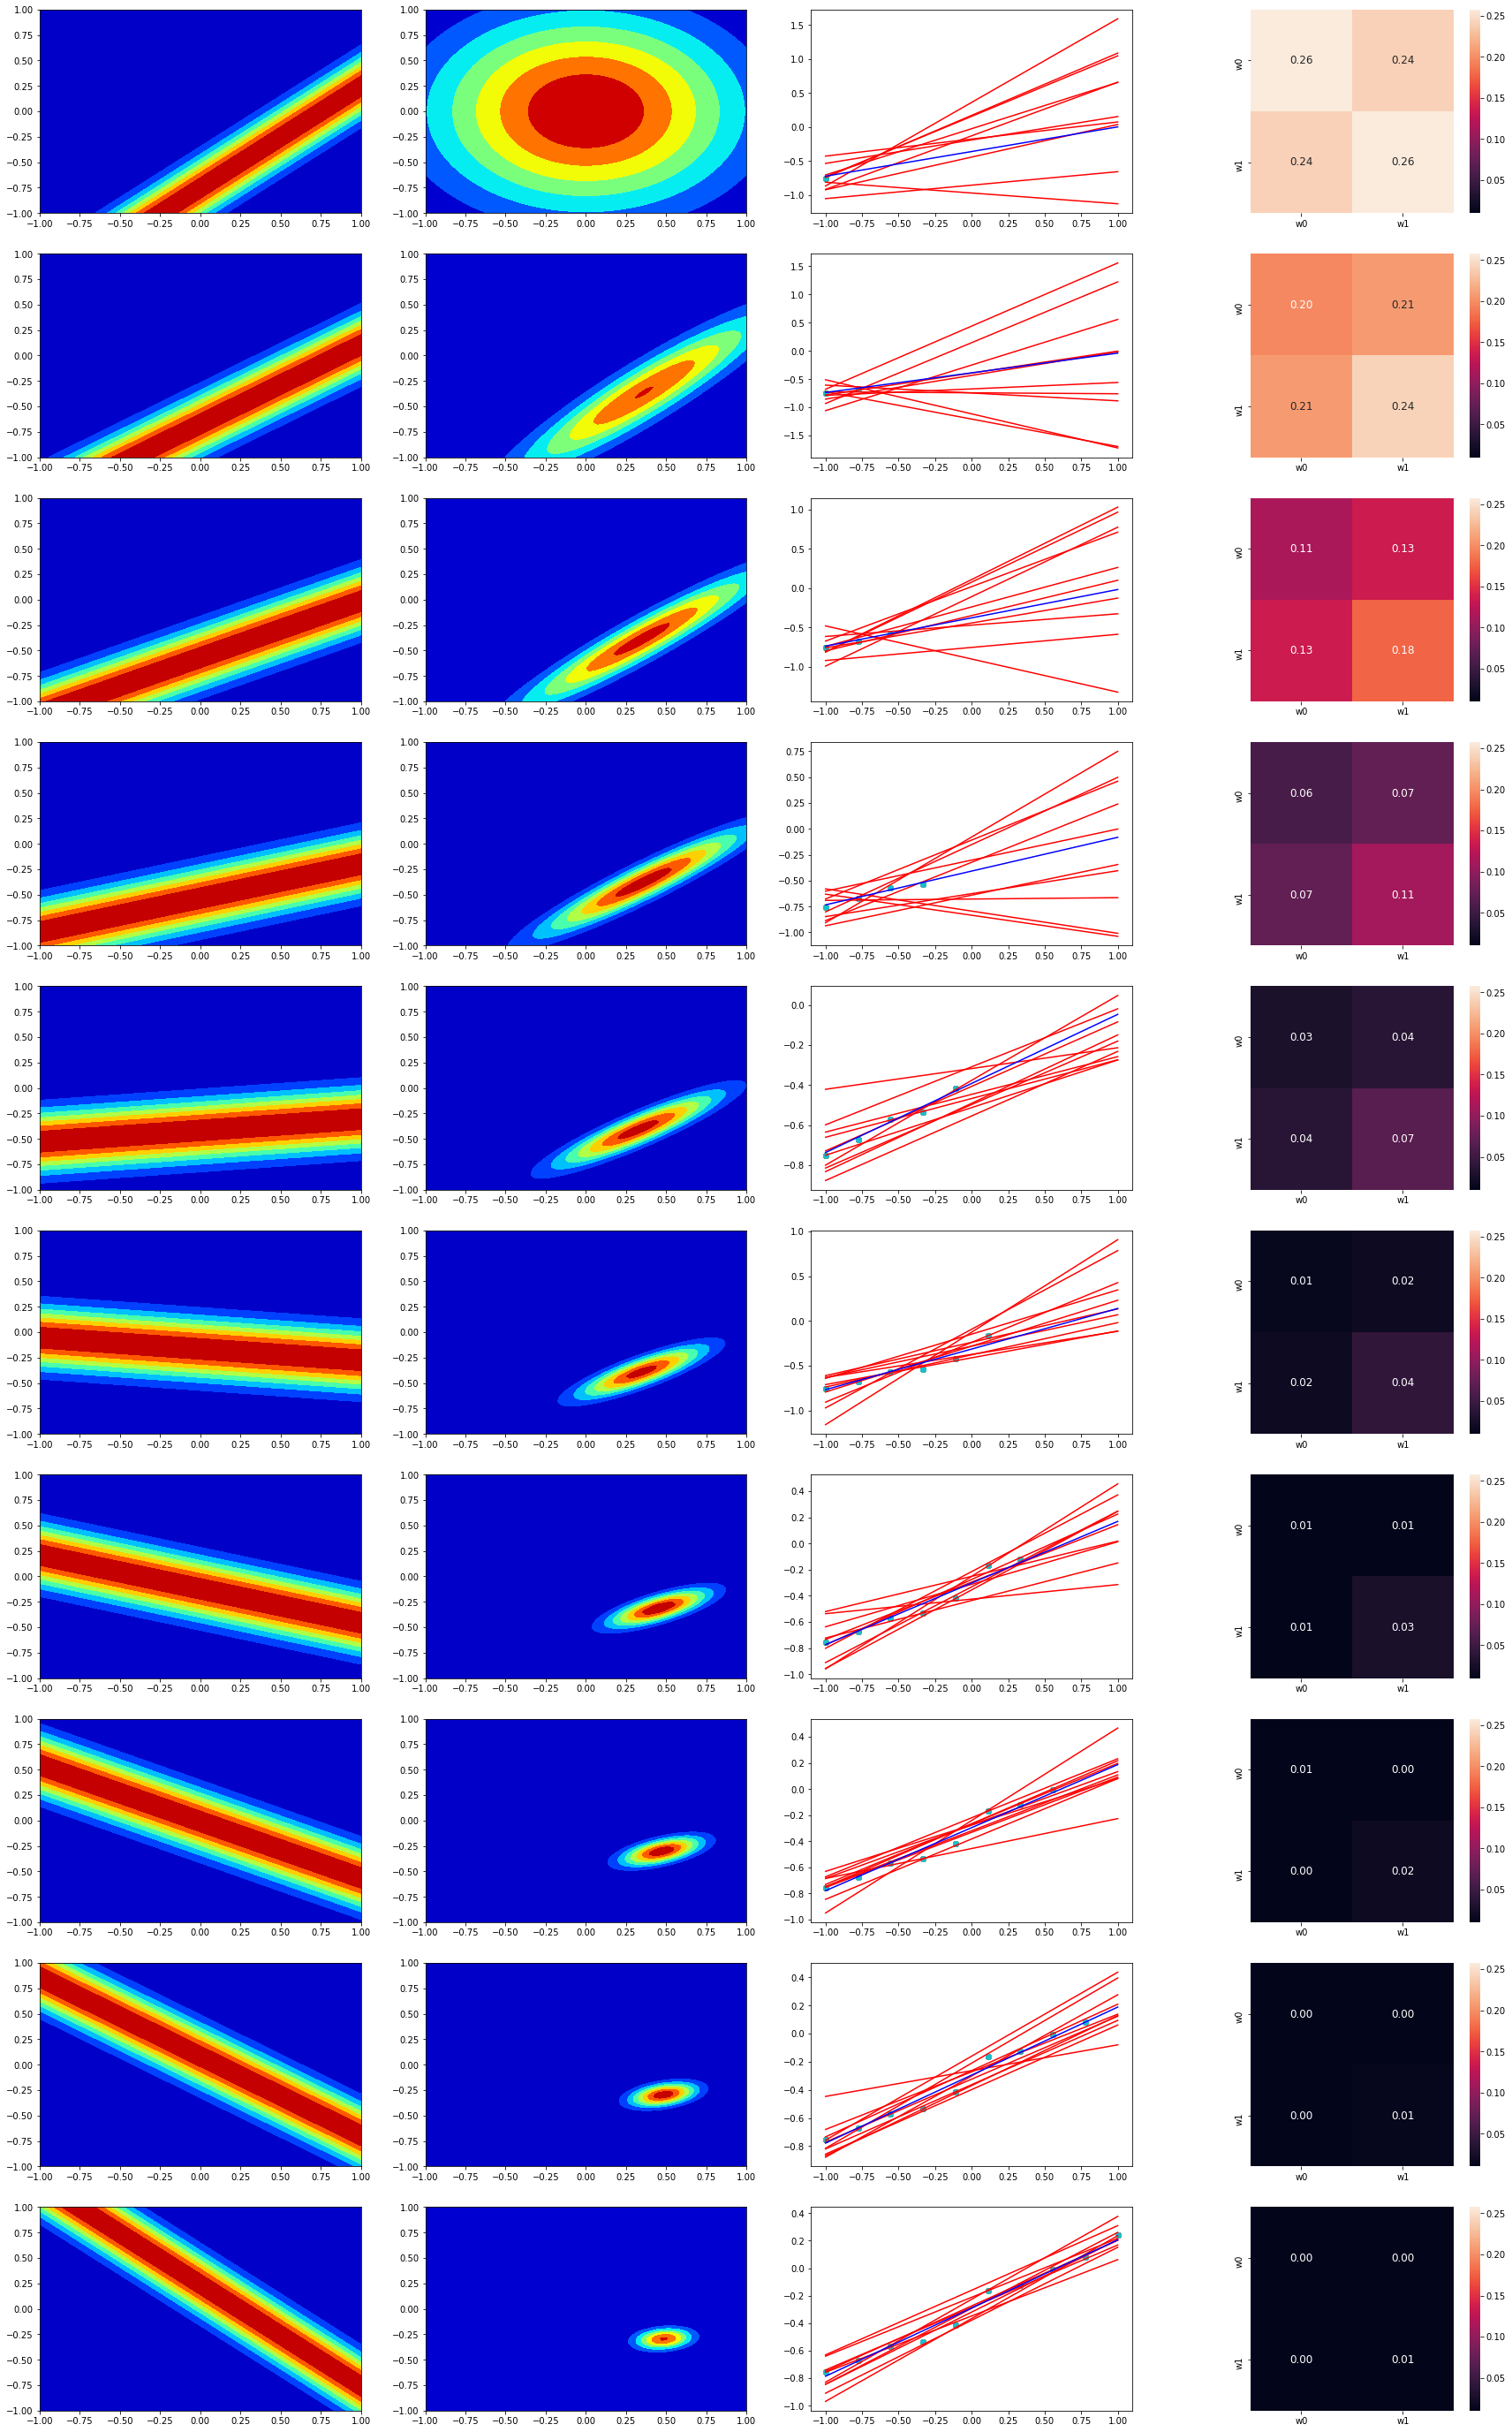

In [13]:
fig = plt.figure()
m0=np.array([0,0])
s0=[[0.5,0],[0,0.5]]
prior_grid=get_prior_grid_calc(w0,w1,0,0.5)
prior_grid
count=0
x_points=np.linspace(-1,1,10)
fig,axs= plt.subplots(10,4,figsize=(30,50))
for i in range(len(x)):
    x_sub=[x[i]]
    y_sub=[y[i]]
    x_total=x[:i+1]
    y_total=y[:i+1]
    phi =[1,x[i]]
    likelihood_grid=get_likelihood_grid_calc(w0,w1,x_sub,y_sub)
    posterior_grid=get_posterior_grid_calc(prior_grid,likelihood_grid)
    a0,a1,mn,sn=pick_n_lines(m0,s0,25,phi,y_sub)
    # Plotted likelihood grid  
    axs[count,0].contourf(w0,w1,likelihood_grid,cmap="jet")
    # Plotted prior grid 
    axs[count,1].contourf(w0,w1,prior_grid,cmap="jet")
    # Plotted 10 points(a0,a1) from Posterior distribution  
    for i in range(len(a0)):
        axs[count,2].plot(x_points,a0[i]+a1[i]*x_points,color="red")
        axs[count,2].scatter(x_total,y_total)
    # Plotted the mean point(a0,a1) of posterior distribution    
    axs[count,2].plot(x_points,mn[0]+mn[1]*x_points,color="blue")
    # Plotted the covariance matrix
    sns.heatmap(sn,cbar=True,annot=True,square=True,robust=True,vmin = 0.010,vmax = 0.2575,
                    fmt='.2f',
                    annot_kws={'size': 12},
                    yticklabels=['w0','w1'],
                    xticklabels=['w0','w1'],
                    ax=axs[count,3],
               )
    m0=mn
    s0=sn
    prior_grid=posterior_grid
    count+=1
plt.savefig("Bayesian_Regression.png")